In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

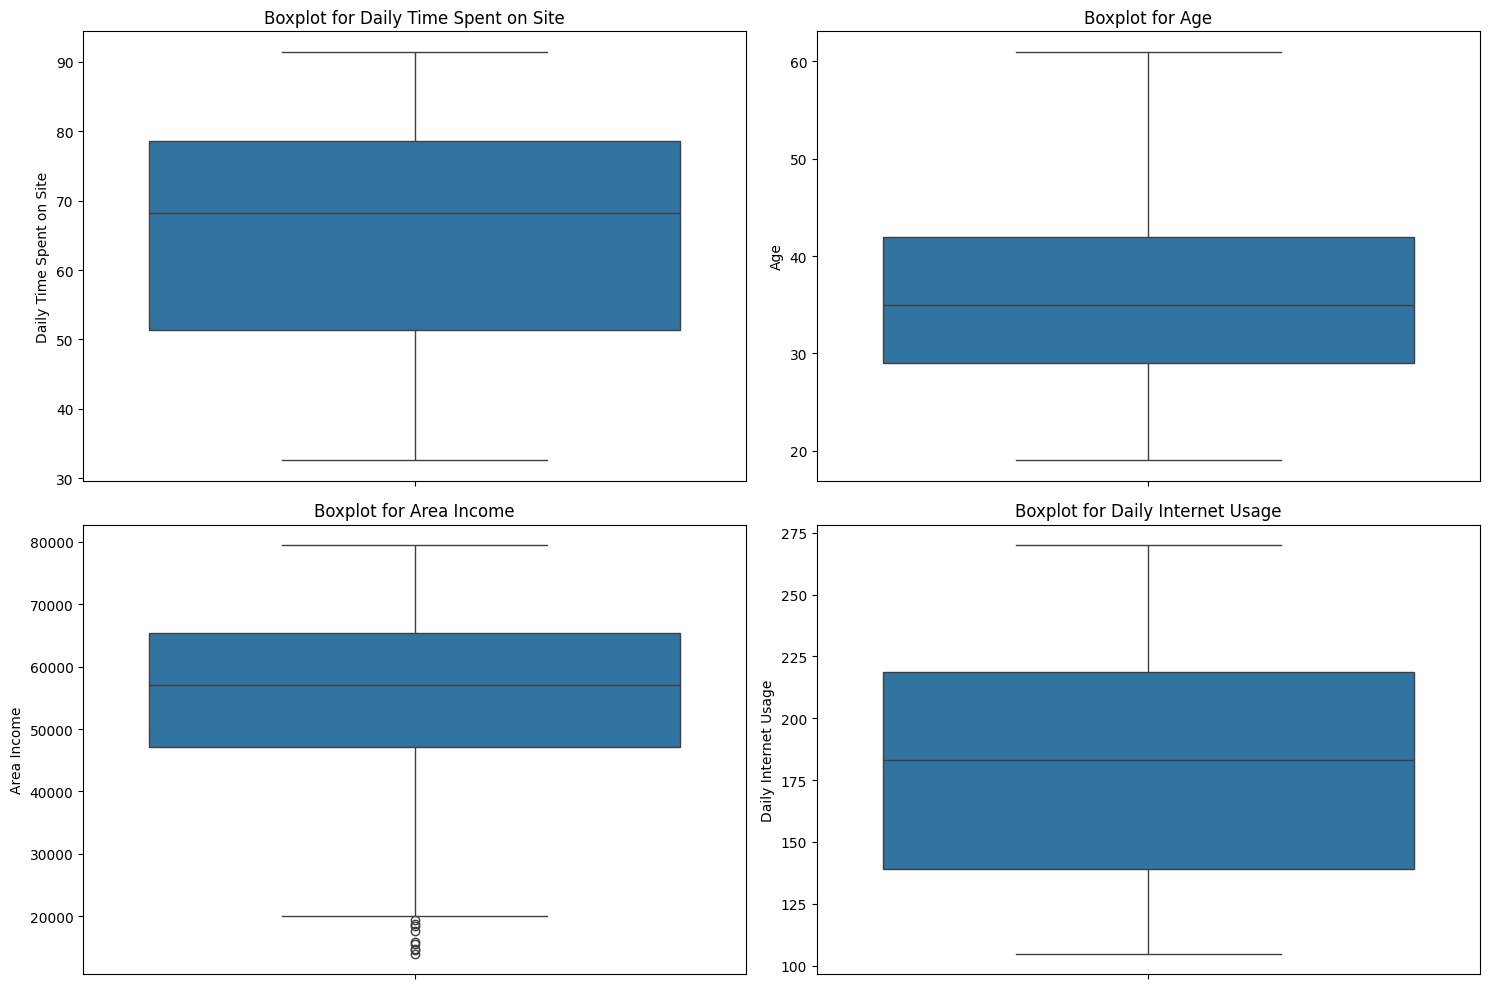

In [ ]:
# Vẽ boxplot nhằm kiểm tra outlier cho các cột có dữ liệu là số
numerical_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(df[col])
    plt.title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

Các biểu đồ boxplot cho thấy sự hiện diện của outliers trong:
"Area Income": Một số giá trị thu nhập nằm ngoài ngưỡng.

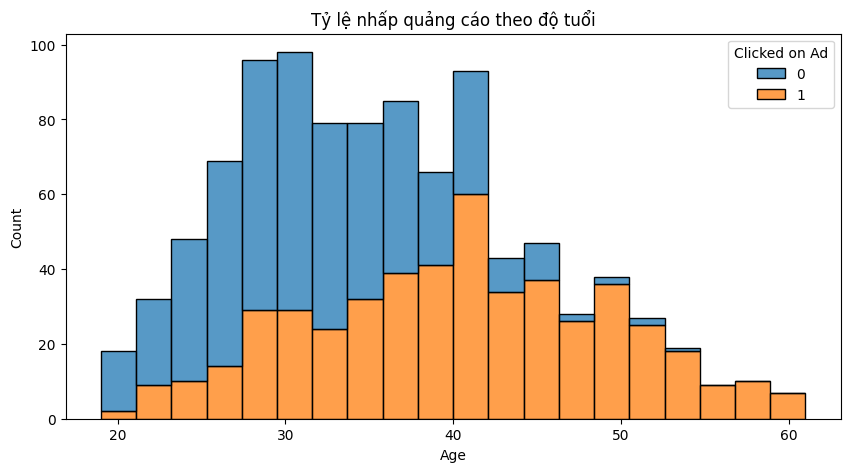

In [ ]:
# Tỷ lệ nhấp quảng cáo theo từng độ tuổi
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned, x='Age', hue='Clicked on Ad', multiple='stack', bins=20, kde=False)
plt.title('Tỷ lệ nhấp quảng cáo theo độ tuổi')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


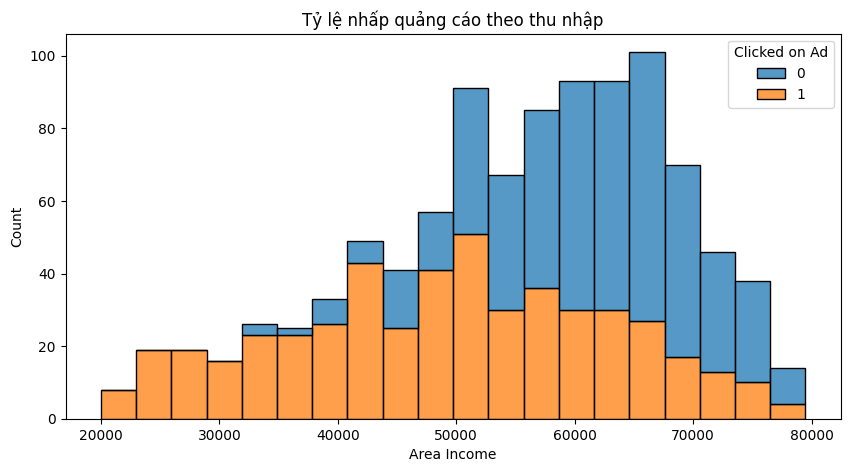

In [ ]:
# Tỷ lệ nhấp quảng cáo theo thu nhập
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned, x='Area Income', hue='Clicked on Ad', multiple='stack', bins=20, kde=False)
plt.title('Tỷ lệ nhấp quảng cáo theo thu nhập')
plt.xlabel('Area Income')
plt.ylabel('Count')
plt.show()

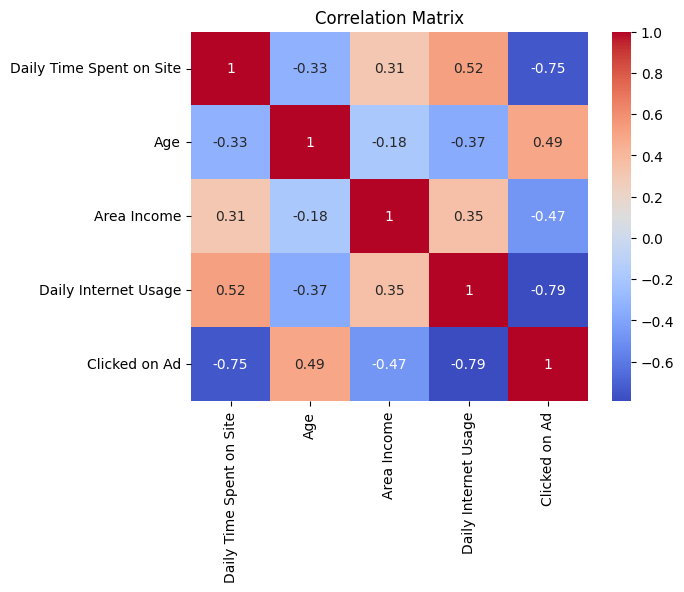

In [ ]:
# Tương quan giữa các cột số liệu
correlation_matrix = df_cleaned[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Tỷ lệ nhấp quảng cáo theo giới tính
gender_click = df_cleaned.groupby('Male')['Clicked on Ad'].mean() * 100
print("Tỷ lệ nhấp quảng cáo theo giới tính:\n", gender_click)

Tỷ lệ nhấp quảng cáo theo giới tính:
 Male
0    51.550388
1    47.368421
Name: Clicked on Ad, dtype: float64
